___
# Modelos probabilísticos contínuos - Alguns resultados da aula
___

## Aula 13

**Preparo Prévio:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Modelo Normal (pág. 197 a 203).

**Hoje:**
1.	Descrever as propriedades do modelo normal quanto aos resultados teóricos.
2. Utilizar modelos normais para resolução de problemas seja com ou sem uso do Python.
3. Contrastar resultados teóricos e empíricos.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

___
## <font color='blue'>Propriedades da distribuição Normal</font>

> **DISTRIBUIÇÃO NORMAL - TEORIA:**

> Seja $X$ uma variável aleatória contínua com média igual a $\mu$ e variância igual a $\sigma^2$. Se essa variável é modelada por uma distribuição normal, dizemos que $X$~$N(\mu,\sigma^2)$. 

> A função densidade de probabilidade - fdp (ou pdf, em inglês) de uma distribuição Normal é dada por:
$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, 
sendo $x\in\mathbb{R}$, $\mu\in\mathbb{R}$ e $\sigma^2>0$.

> Alterando possíveis valores de $x$ em torno de $\mu$ e calculando, para cada $x$, o respectivo valor de $f(x)$, é possível visualizar graficamente a famosa distribuição em forma de sino.


> **DISTRIBUIÇÃO NORMAL - PYTHON:** <sup> [https://en.wikipedia.org/wiki/SciPy]

> Algumas funções úteis para desenvolver seu código: <sup> [http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html]

> Com a linha de comando `from scipy import stats` e assumindo que $E(X)=\mu$ e $Var(X)=\sigma^2$, alguns dos exemplos abaixo úteis para trabalhar com a distribuição normal no Python:
* $f(x)$: `stats.norm.pdf(x, loc=mu, scale=sigma)`
* $P(X\leq x)$: `stats.norm.cdf(x, loc=mu, scale=sigma)`
* $x$ tal que $P(X\leq x)=p$: `stats.norm.ppf(p, loc=mu, scale=sigma)`




In [41]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var
import numpy as np

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gabiuas/Ciencia dos Dados/Aula13


___
### <font color='green'>Gráfico distribuição Normal alterando valores para a média $\mu$  e/ou  variância $\sigma^2$ </font>


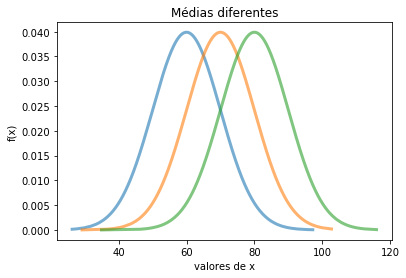

In [5]:
#Distribuição Normal 
#Média muda 
#Desvio padrão igual
sigma = 10
lista = (60, 70, 80)
for mu in lista:
    x=sorted(stats.norm.rvs(size=4000, loc=mu, scale=sigma))
    plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
    
plt.title('Médias diferentes')
plt.xlabel('valores de x')
plt.ylabel('f(x)')

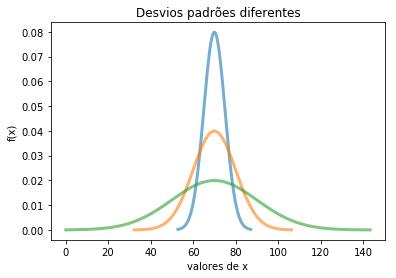

In [6]:
#Distribuição Normal 
#Média igual
#Desvio padrão muda
mu = 70
lista = (5, 10, 20)
for sigma in lista:
    x=sorted(stats.norm.rvs(size=4000, loc=mu, scale=sigma))
    plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
    
plt.title('Desvios padrões diferentes')
plt.xlabel('valores de x')
plt.ylabel('f(x)')

___
### <font color='green'> Propriedades da distribuição normal </font>

In [7]:
#Probabilidade de X estar entre mu mais ou menos c*sigma
#Pode alterar valores de mu (média de X) e de sigma (desvio padrao de X)!
#Alterações de mu e sigma NÃO alteram as probabilidades abaixo, pois trata-se de propriedade !!
mu = 70
sigma = 10
print('Probabilidade de X acontecere considerando UM desvio padrão em torno da média:', 
      stats.norm.cdf(mu+sigma, loc=mu, scale=sigma)-stats.norm.cdf(mu-sigma, loc=mu, scale=sigma))

print('Probabilidade de X acontecere considerando DOIS desvio padrão em torno da média:', 
      stats.norm.cdf(mu+2*sigma, loc=mu, scale=sigma)-stats.norm.cdf(mu-2*sigma, loc=mu, scale=sigma))

print('Probabilidade de X acontecere considerando TRÊS desvio padrão em torno da média:', 
      stats.norm.cdf(mu+3*sigma, loc=mu, scale=sigma)-stats.norm.cdf(mu-3*sigma, loc=mu, scale=sigma))

Probabilidade de X acontecere considerando UM desvio padrão em torno da média: 0.682689492137
Probabilidade de X acontecere considerando DOIS desvio padrão em torno da média: 0.954499736104
Probabilidade de X acontecere considerando TRÊS desvio padrão em torno da média: 0.997300203937


___
## <font color='blue'>Exemplo 1 da Aula 13 </font>

Uma loja de produtos automotivos  vende um certo lubrificante. Sempre que o estoque chega a 21 litros um novo pedido de compra é feito.  <br />
O gerente da loja acha que a quantidade deixada em estoque até que o pedido do lubrificante seja entregue pode estar prejudicando suas vendas. Verificou-se que durante o período entre o pedido de compra e a entrega se consomem, em média, 15 litros de lubrificante, com desvio padrão de 6 litros. Verificou-se também que a distribuição de consumo neste período é bem aproximada por uma normal. <br />
O valor deixado em estoque no momento do pedido é adequado?  <br />

Vamos caracterizar a variável aleatória: X~N(15,36), onde X é a quantidade de combustível no tanque até o próximo pedido.


In [60]:
#Simulação de valores a partir de uma distribuição Normal com média 15 e desvio padrão 6 apenas 
#Simulação de dados para visualizar histograma com densidade da normal
mu = 15
sigma = 6
x=sorted(stats.norm.rvs(size=10000, loc=mu, scale=sigma))

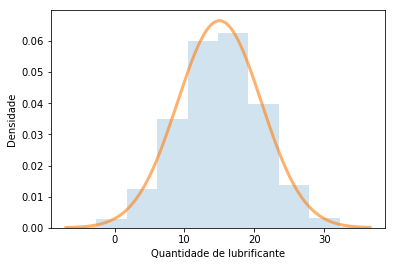

In [61]:
#Distribuição Normal com média 15 e desvio padrão 6
plt.hist(x, normed=1, histtype='stepfilled', alpha=0.2)
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
plt.title('')
plt.xlabel('Quantidade de lubrificante')
plt.ylabel('Densidade')

O estoque acaba quando a demanda durante o tempo de espera (entre o pedido de compra e a entrega) é maior que 21 litros. Qual a probabilidade de que isto aconteça?


In [64]:
print(1-(stats.norm.cdf(21, loc=mu, scale=sigma)))


0.158655253931


O gerente pretende demorar mais tempo até fazer novos pedidos de compra.<br />
Logo, decide que um novo pedido de compra será feito sempre que o estoque chegar a 20 litros. <br />
Calcule agora a probabilidade de que o estoque acabe antes de que o pedido chegue a loja?

In [55]:
print(1-(stats.norm.cdf(20, loc=mu, scale=sigma)))

0.98886451052


Com quantos litros de lubrificante no estoque a loja de produtos automotivos deve fazer o pedido de compra de modo a ter no máximo 5% de probabilidade de ficar sem lubrificante?


In [27]:
print((stats.norm.ppf(0.95, loc=mu, scale=sigma)))

24.8691217617


___
## <font color='blue'>Exemplo 2 da Aula 13 </font>
Uma empresa automotiva diz que um determinado caminhão por ela produzido apresenta algum tipo de problema no motor após, em média, rodar 100 mil quilômetros, com um desvio padrão de 35 mil quilômetros.<br /> 
Além disso, acredita-se que a distribuição da distância percorrida antes de apresentar algum tipo de problema no motor (X) é bem aproximada por uma normal. 


In [30]:
mu=100
sigma=35

Sabendo que a garantia de um caminhão é dada apenas até completar 90 mil km, qual  a probabilidade de algum tipo de problema no motor acontecer após perder a garantia de fábrica?

In [32]:
print(1-(stats.norm.cdf(90, loc=mu, scale=sigma)))

0.612451518902


Qual deve ser a garantia de um caminhão, se a probabilidade de apresentar algum tipo de problema no motor após perder a garantia de fábrica for, no máximo, 15%?

In [34]:
print((stats.norm.ppf(0.85, loc=mu, scale=sigma)))

136.275168632


___
## <font color='blue'>Exercício 4 da Aula 13 </font>
Em um processo industrial, o diâmetro de um rolamento é uma parte importante do processo.<br />
Sabe-se que a probabilidade de um rolamento ter diâmetro maior do 2,98 cm é de 80%.<br /> 
Sabe-se, também que a probabilidade de que um rolamento tenha diâmetro abaixo de 2,97 cm é de 10%.<br /> 
Admitindo que o diâmetro de um rolamento segue uma distribuição normal, determine a média e o desvio-padrão dos diâmetros dos rolamentos que saem da linha de produção.<br />
Determine a especificação que represente a maior distância da média, para mais ou para menos, contendo 95% dos rolamentos produzidos. 


In [35]:
mu=100
sigma=35

In [36]:
print((stats.norm.ppf(0.85, loc=mu, scale=sigma)))

136.275168632
